In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
os.makedirs('figures', exist_ok=True)

# Paths - change if needed
TRACKS_CSV = 'spotify_tracks.csv'
DESC_CSV = 'spotify_data_description.csv'

df = pd.read_csv(TRACKS_CSV)
df_desc = pd.read_csv(DESC_CSV)
df.head()

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024,59,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",0.0241,0.753,97297.0,...,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024,47,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,0.0851,0.780,207369.0,...,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil
2,59NoiRhnom3lTeRFaBzOev,Mayakiriye Sirikiriye - Orchestral EDM,"Anirudh Ravichander, Anivee, Alvin Bruno",2024,35,https://i.scdn.co/image/ab67616d0000b27334a1dd...,Mayakiriye Sirikiriye (Orchestral EDM),0.0311,0.457,82551.0,...,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598,https://open.spotify.com/track/59NoiRhnom3lTeR...,Tamil
3,5uUqRQd385pvLxC8JX3tXn,Scene Ah Scene Ah - Experimental EDM Mix,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",2024,24,https://i.scdn.co/image/ab67616d0000b27332e623...,Scene Ah Scene Ah (Experimental EDM Mix),0.2270,0.718,115831.0,...,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362,https://open.spotify.com/track/5uUqRQd385pvLxC...,Tamil
4,1KaBRg2xgNeCljmyxBH1mo,Gundellonaa X I Am A Disco Dancer - Mashup,"Anirudh Ravichander, Benny Dayal, Leon James, ...",2024,22,https://i.scdn.co/image/ab67616d0000b2735a59b6...,Gundellonaa X I Am a Disco Dancer (Mashup),0.0153,0.689,129621.0,...,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593,https://open.spotify.com/track/1KaBRg2xgNeCljm...,Tamil


In [24]:
df = df.copy()

for c in ['key', 'mode', 'time_signature']:
    if c in df.columns:
        df[c] = df[c].replace(-1, pd.NA)
        df[c] = pd.to_numeric(df[c], errors='coerce').astype('Int64')

if 'duration_ms' in df.columns:
    df['duration_sec'] = (df['duration_ms'] / 1000).round().astype('Int64')

if 'language' in df.columns:
    df['language'] = df['language'].fillna('Unknown')

if 'track_id' in df.columns:
    df = df.drop_duplicates(subset=['track_id'])

df.shape

(62239, 24)

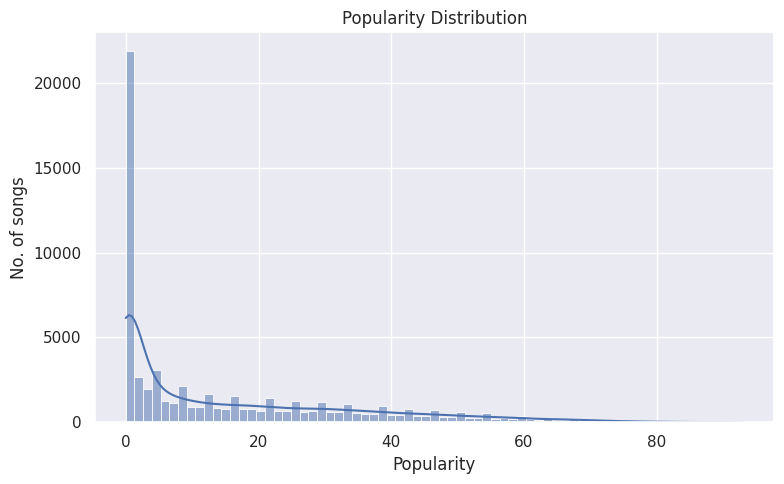

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['popularity'].dropna(), kde=True)
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('No. of songs')
plt.tight_layout()
plt.savefig('figures/graph1_popularity_distribution.png', dpi=150)
plt.show()

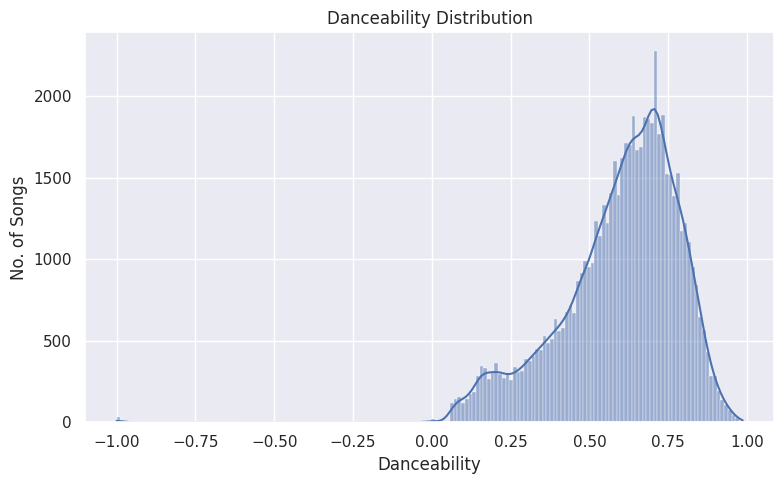

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['danceability'].dropna(), kde=True)
plt.title('Danceability Distribution')
plt.xlabel('Danceability')
plt.ylabel('No. of Songs')
plt.tight_layout()
plt.savefig('figures/graph2_danceability_distribution.png', dpi=150)
plt.show()

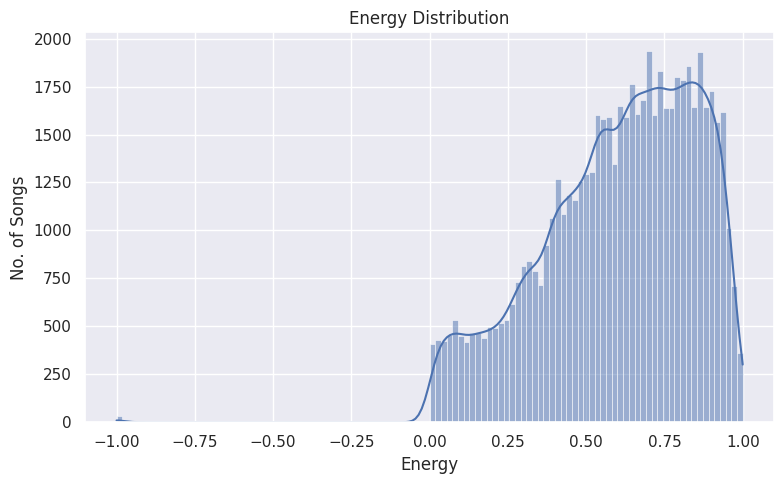

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['energy'].dropna(), kde=True)
plt.title('Energy Distribution')
plt.xlabel('Energy')
plt.ylabel('No. of Songs')
plt.tight_layout()
plt.savefig('figures/graph3_energy_distribution.png', dpi=150)
plt.show()

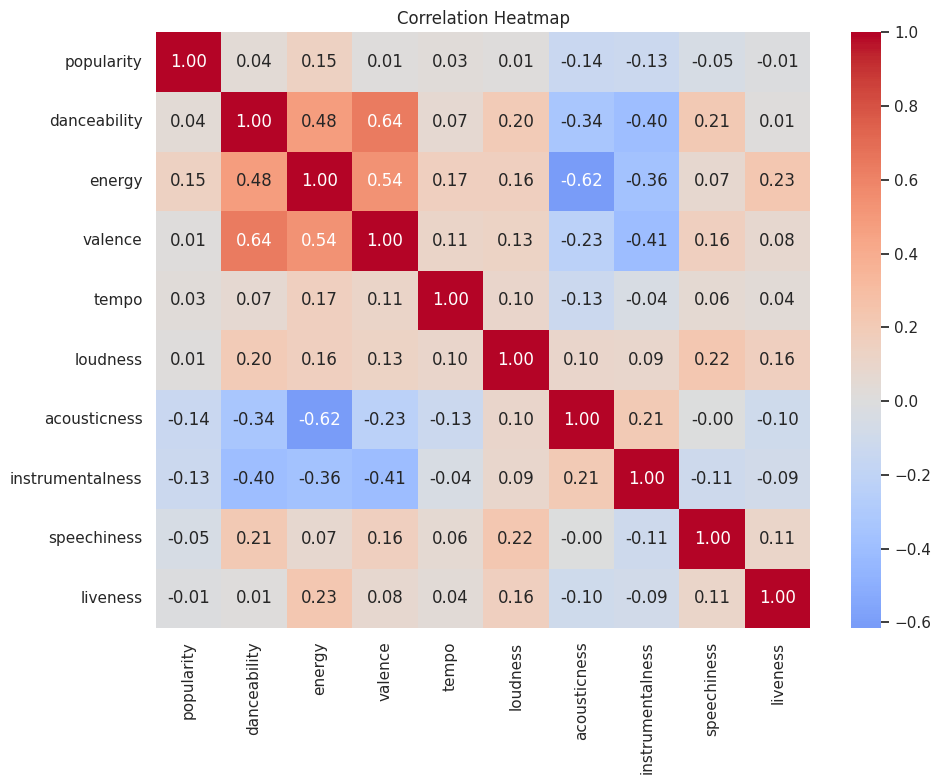

In [7]:
num_cols = ['popularity','danceability','energy','valence','tempo','loudness','duration_sec','acousticness','instrumentalness','speechiness','liveness']
num_cols = [c for c in num_cols if c in df.columns]
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('figures/graph4_correlation_heatmap.png', dpi=150)
plt.show()

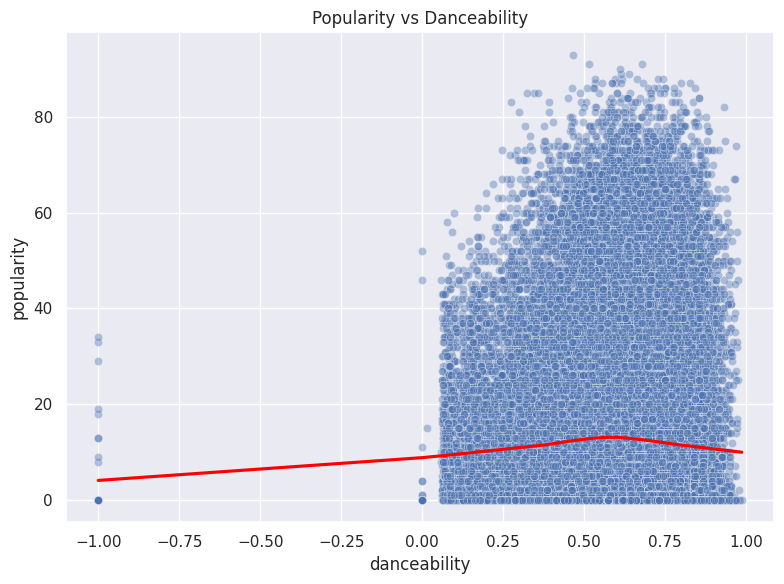

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='danceability', y='popularity', alpha=0.4)
sns.regplot(data=df, x='danceability', y='popularity', scatter=False, lowess=True, ci=None, color='red')
plt.title('Popularity vs Danceability')
plt.tight_layout()
plt.savefig('figures/graph5_popularity_vs_danceability.png', dpi=150)
plt.show()


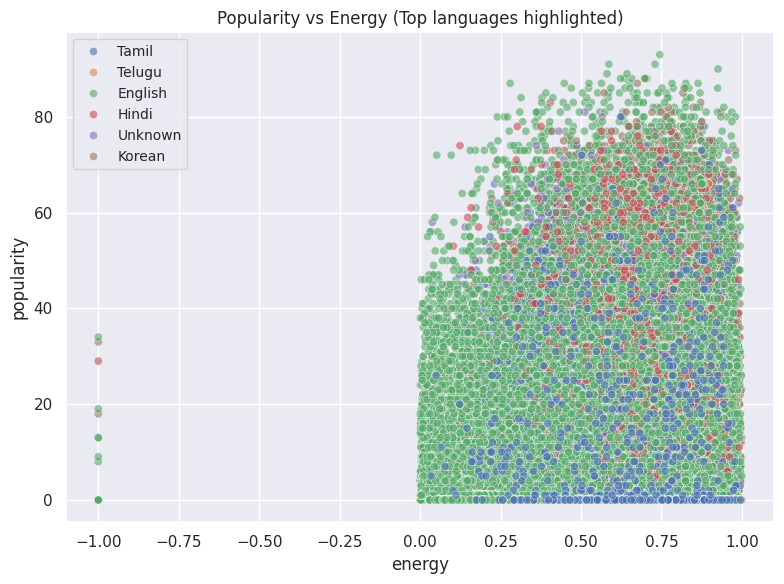

In [9]:
top_langs = df['language'].value_counts().nlargest(6).index.tolist() if 'language' in df.columns else []
df_lang = df[df['language'].isin(top_langs)].copy() if top_langs else df.copy()
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_lang, x='energy', y='popularity', hue='language', alpha=0.6)
plt.title('Popularity vs Energy (Top languages highlighted)')
plt.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.savefig('figures/graph6_popularity_vs_energy_by_language.png', dpi=150)
plt.show()


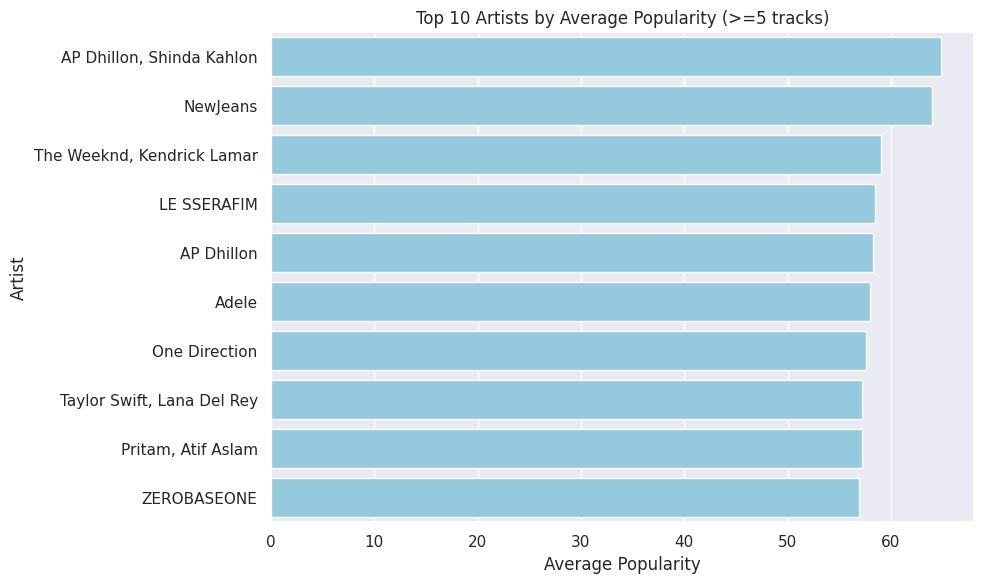

In [14]:
if 'artist_name' in df.columns and 'popularity' in df.columns:
    artist_avg = df.groupby('artist_name').agg({'popularity': ['mean', 'count']})
    artist_avg.columns = ['pop_mean', 'count']
    artist_avg = artist_avg[artist_avg['count'] >= 5].sort_values('pop_mean', ascending=False).head(10)
    artist_avg = artist_avg.rename_axis('Artist').reset_index()

    plt.figure(figsize=(10,6))
    sns.barplot(x='pop_mean', y='Artist', data=artist_avg, color='skyblue')
    plt.xlabel('Average Popularity')
    plt.ylabel('Artist')
    plt.title('Top 10 Artists by Average Popularity (>=5 tracks)')
    plt.tight_layout()
    plt.savefig('figures/graph7_top_artists_avg_popularity.png', dpi=150)
    plt.show()


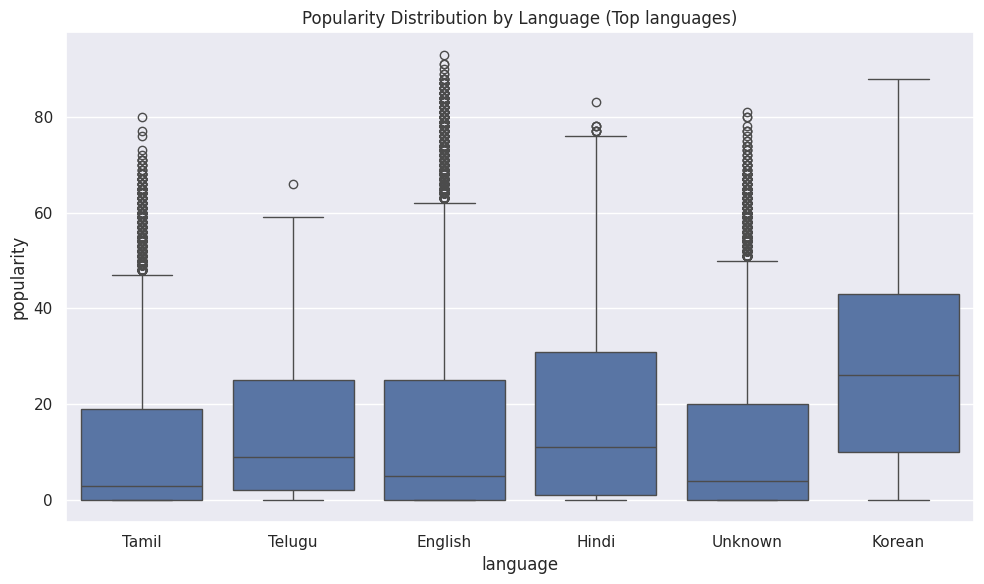

In [15]:
if 'language' in df.columns and 'popularity' in df.columns:
    top_langs = df['language'].value_counts().nlargest(6).index.tolist()
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df[df['language'].isin(top_langs)], x='language', y='popularity')
    plt.title('Popularity Distribution by Language (Top languages)')
    plt.tight_layout()
    plt.savefig('figures/graph8_language_vs_popularity.png', dpi=150)
    plt.show()


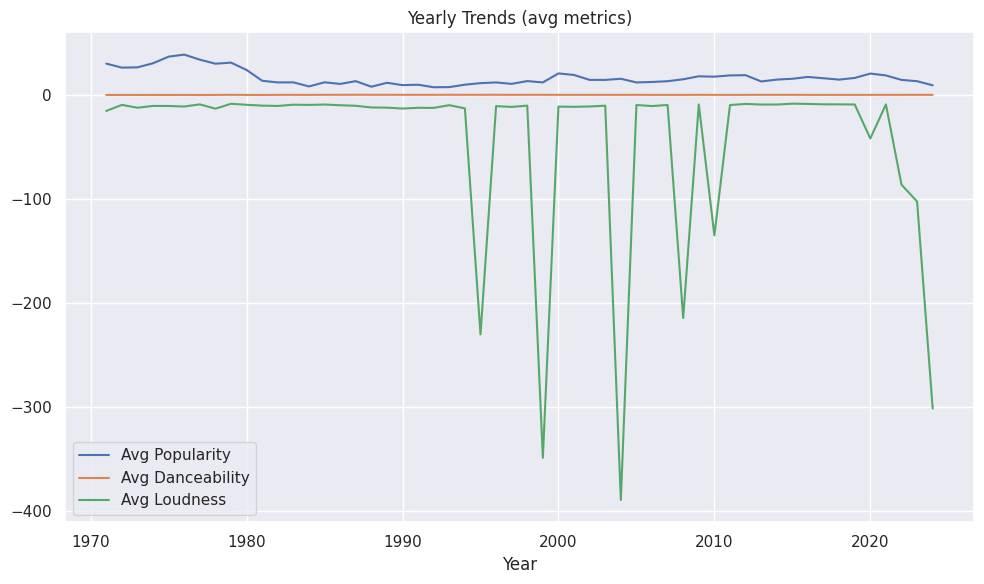

In [16]:
if 'year' in df.columns:
    yearly = df.groupby('year').agg({'popularity':'mean','danceability':'mean','loudness':'mean'}).dropna()
    plt.figure(figsize=(10,6))
    yearly['popularity'].plot(label='Avg Popularity')
    yearly['danceability'].plot(label='Avg Danceability')
    yearly['loudness'].plot(label='Avg Loudness')
    plt.legend()
    plt.title('Yearly Trends (avg metrics)')
    plt.xlabel('Year')
    plt.tight_layout()
    plt.savefig('figures/graph9_yearly_trends.png', dpi=150)
    plt.show()

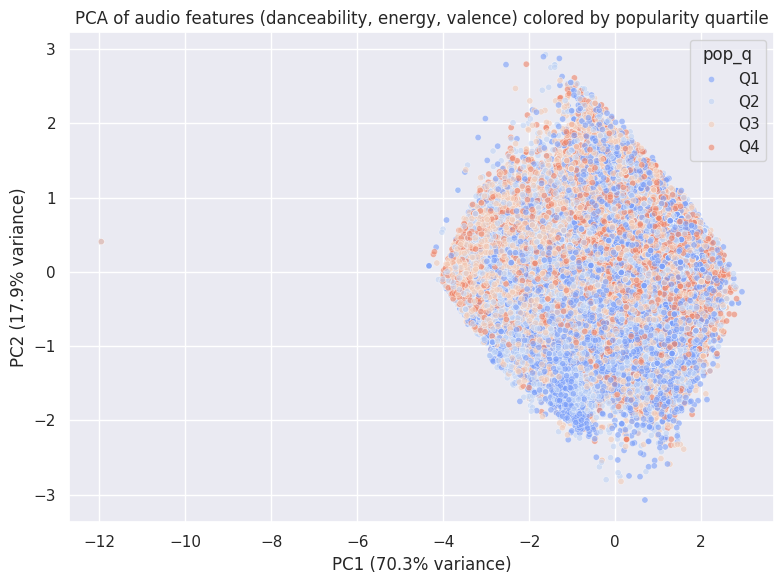

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

feat_cols = [c for c in ['danceability','energy','valence'] if c in df.columns]
df_pca = df.dropna(subset=feat_cols + (['popularity'] if 'popularity' in df.columns else []))

X = df_pca[feat_cols].values
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)
df_pca['pc1'] = pcs[:,0]
df_pca['pc2'] = pcs[:,1]

pop_vals = df_pca['popularity'] + np.random.uniform(0, 1e-6, size=len(df_pca))
df_pca['pop_q'] = pd.qcut(pop_vals, 4, labels=['Q1','Q2','Q3','Q4'])

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='pc1', y='pc2', hue='pop_q', alpha=0.6, s=20, palette='coolwarm')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('PCA of audio features (danceability, energy, valence) colored by popularity quartile')
plt.tight_layout()
plt.savefig('figures/graph10_pca_popularity_quartiles.png', dpi=150)
plt.show()


/tmp/ipython-input-578760690.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acoustic_pop = df.groupby('acoustic_bin')['popularity'].mean().reset_index()
/tmp/ipython-input-578760690.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=acoustic_pop, x='acoustic_bin', y='popularity', palette='viridis')


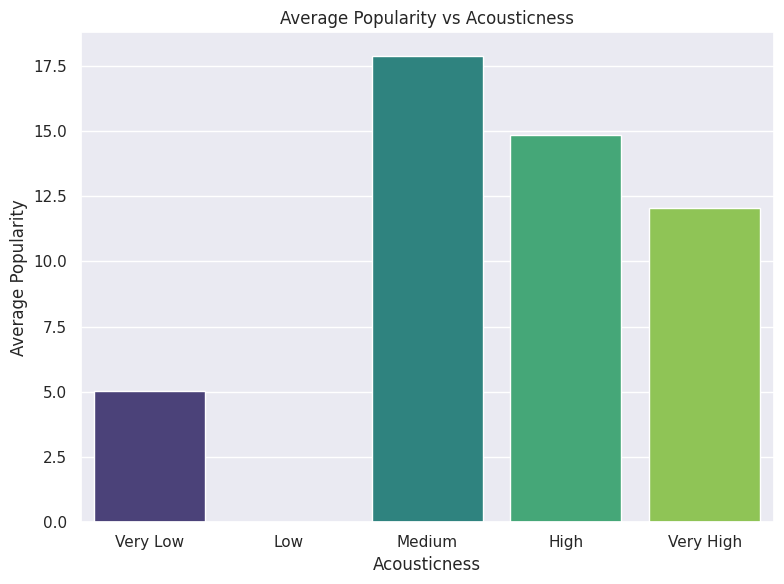

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

if 'acousticness' in df.columns and 'popularity' in df.columns:
    df['acoustic_bin'] = pd.cut(df['acousticness'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    acoustic_pop = df.groupby('acoustic_bin')['popularity'].mean().reset_index()

    plt.figure(figsize=(8,6))
    sns.barplot(data=acoustic_pop, x='acoustic_bin', y='popularity', palette='viridis')
    plt.xlabel('Acousticness')
    plt.ylabel('Average Popularity')
    plt.title('Average Popularity vs Acousticness')
    plt.tight_layout()
    plt.savefig('figures/graph_popularity_vs_acousticness.png', dpi=150)
    plt.show()
